# Bootstrapping with 1-D harmonic potential

In this code, we demonstrate 1-dimensional harmonic potential with $\hbar = 1$ and $m = 1$

\begin{equation*}
    V(x) = kx^2
\end{equation*}

In [1]:
import os, time
import numpy as np
import sympy as sp
from bootstrap_sympy import sympy_solve_intervals, plot_energy_interval

import matplotlib.pyplot as plt
import seaborn as sns

## Recursion relation for 1-d harmonic potential

\begin{equation*}
    <X^{s}> \ =\  \frac{(s-1)E}{ks}<X^{s-2}> + \frac{(s-1)(s-2)(s-3)}{8ks}<X^{s-4}>
\end{equation*}

In [2]:
class HarmonicPotentialMatrix:
    def __init__(self, N):
        '''
            k    : constant of harmonic potential
            E    : eigen-energy to be solved
            Xs_list : list of X^s, the expectation value of position operator X to the s power
        '''

        self.k = sp.symbols('k')
        self.E = sp.symbols('E')
        
        self.Xs_list = []
        for i in range(2*(N-1)+1):
            if i >= 4:
                self.Xs_list.append(self.Xs_resursion(s=i, Xs_2=self.Xs_list[i-2], Xs_4=self.Xs_list[i-4]))
            else:
                self.Xs_list.append(self.Xs_resursion(s=i))

    def Xs_resursion(self, s, Xs_2=None, Xs_4=None):
        '''
            find the <X^s> with recursion relation
        '''
        if s == 0:
            return 1
        elif s == 2:
            return self.E / (2*self.k)
        elif s%2 != 0:
            return 0
        elif Xs_2 != None and Xs_4 != None:
            return (s-1)*self.E/(self.k*s)*(Xs_2) + (s-1)*(s-2)*(s-3)/(8*self.k*s)*(Xs_4)
        else:
            return (s-1)*self.E/(self.k*s)*self.Xs_resursion(s-2) + (s-1)*(s-2)*(s-3)/(8*self.k*s)*self.Xs_resursion(s-4)

    def submatrix(self, L):
        '''
            return the L*L matrix for [i,j] element = <X^(i+j)>
        '''
        return sp.Matrix([[self.Xs_list[i+j] for j in range(L)] for i in range(L)])

In [3]:
hp_config = {
    'k' : 0.5,
    'x_inf' : 0,
    'x_sup' : 10,
    'round' : 15,
    'plot_step' : 3,
    'threshold' : 1e-2,
    'initial_interval' : sp.Interval(0, sp.oo),
}

hp_matrix = HarmonicPotentialMatrix(N=hp_config['round'])
energy_intervals, confirmed_intervals = sympy_solve_intervals(hp_matrix, hp_config, det_indep=False)

print(confirmed_intervals)

Now calculating determinant size 1x1
Time cost = 0.00
Round interval = Interval(0, oo)

Now calculating determinant size 2x2
Time cost = 0.08
Round interval = Interval(0, oo)

Now calculating determinant size 3x3
Time cost = 0.29
Round interval = Interval(0, oo)

Now calculating determinant size 4x4
Time cost = 0.28
Round interval = Interval(0.264017327130108, oo)

Now calculating determinant size 5x5
Time cost = 0.35
Round interval = Interval(0.264017327130108, oo)

Now calculating determinant size 6x6
Time cost = 0.64
Round interval = Interval(0.417458228325692, oo)

Now calculating determinant size 7x7
Time cost = 1.93
Round interval = Union(Interval(0.417458228325692, 0.566507626022330), Interval(1.13185451266325, oo))

Now calculating determinant size 8x8
Time cost = 1.26
Round interval = Union(Interval(0.480732040704975, 0.566507626022330), Interval(1.13185451266325, oo))

Now calculating determinant size 9x9
Time cost = 1.51
Round interval = Union(Interval(0.480732040704975, 0.5

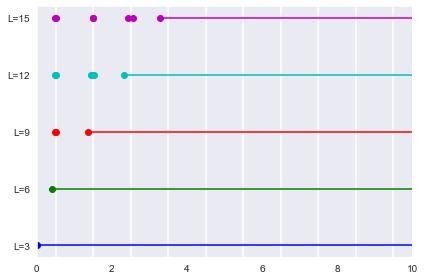

In [6]:
energy_eigenvalues = [0.5 * (2*hp_config['k'])**0.5]
while energy_eigenvalues[-1] < hp_config['x_sup']:
    energy_eigenvalues.append(energy_eigenvalues[-1] + (2*hp_config['k'])**0.5)

sns.set_style('dark')
fig, ax = plot_energy_interval(energy_intervals, energy_eigenvalues, hp_config)
plt.tight_layout()
plt.show()

In [7]:
np.save(os.path.join(os.path.abspath(''), 'hp_energy_intervals.npy'), energy_intervals, allow_pickle=True)